In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
X_train = pd.read_csv("datasets/restaurants/train_task1.csv",converters={'TargetWordList':eval,'OpinionCategoryList':eval,'OpinionSubcategoryList':eval,'OpinionPolarityList':eval})
X_test = pd.read_csv("datasets/restaurants/gold_1.csv",converters={'TargetWordList':eval,'OpinionCategoryList':eval,'OpinionSubcategoryList':eval,'OpinionPolarityList':eval})

In [3]:
## Remove sentences with no opinion
X_train = X_train[X_train.OpinionCategoryList.map(lambda x: len(x))!=0]
X_test = X_test[X_test.OpinionCategoryList.map(lambda x: len(x))!=0]

In [4]:
unique_categories= ['RESTAURANT', 'LOCATION', 'AMBIENCE', 'SERVICE', 'FOOD' ,'DRINKS']

In [5]:
## Create aspect sentiment list based on the first occurence of the aspect and the corresponding sentiment
for c in unique_categories:
    X_train[c+"_Sentiment"] = X_train.apply(lambda x:-1 if c not in x['OpinionCategoryList'] else x['OpinionPolarityList'][x['OpinionCategoryList'].index(c)],axis=1)
    X_test[c+"_Sentiment"] = X_test.apply(lambda x:-1 if c not in x['OpinionCategoryList'] else x['OpinionPolarityList'][x['OpinionCategoryList'].index(c)],axis=1)

In [6]:
num_sent = []
for i in range(1,4):
    num_sent.append(X_train[X_train.OpinionCategoryList.map(lambda x: len(set(x)))==i].shape[0])
num_sent.append(X_train[X_train.OpinionCategoryList.map(lambda x: len(set(x)))>3].shape[0])    

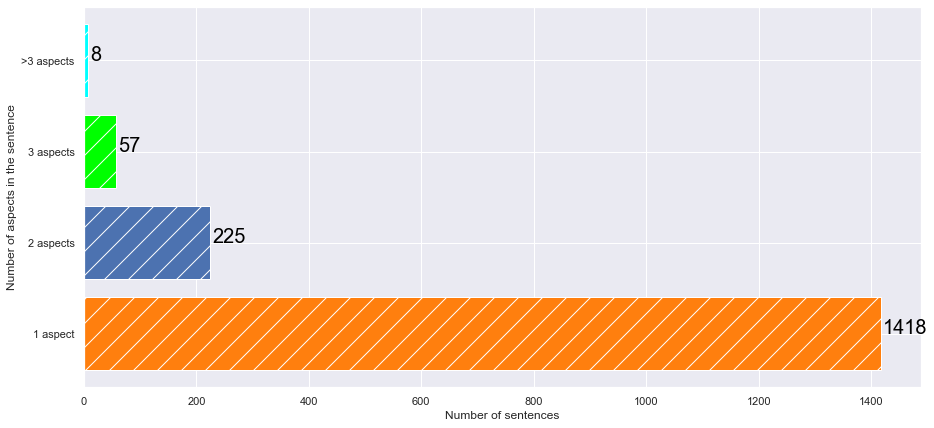

In [7]:
fig = plt.figure(figsize=(15,7))
# Make fake dataset
bars = ['1 aspect','2 aspects','3 aspects','>3 aspects']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, num_sent, color=['tab:orange',"b",'lime',"cyan","red",'m',"r","g"],hatch="/")


for i, v in enumerate(num_sent):
    plt.text(v + 3, i, str(v), color='black', fontsize=20)
plt.xlabel("Number of sentences")
plt.ylabel("Number of aspects in the sentence")

# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In [8]:
# Split train and validation
X_train, X_val = train_test_split(X_train, test_size=0.25, shuffle=True, random_state=7)

In [9]:
height = []
for c in unique_categories:
    height.append(X_train[X_train.OpinionCategoryList.map(lambda x: c in x)].shape[0])

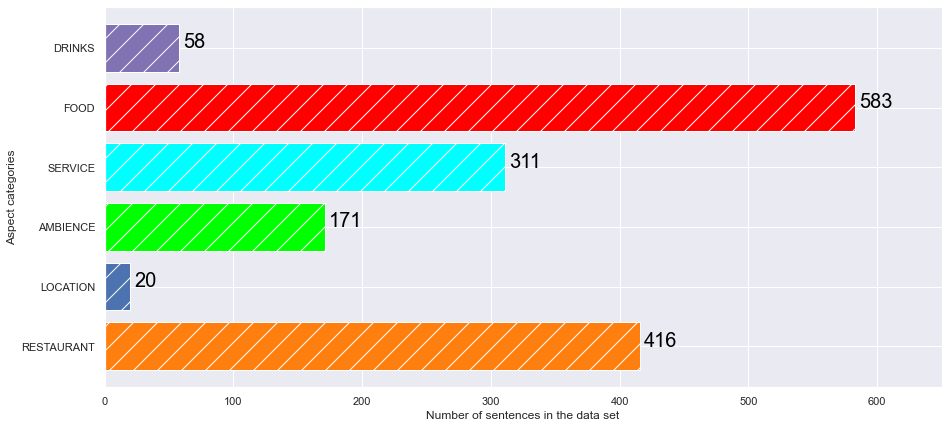

In [10]:
fig = plt.figure(figsize=(15,7))

bars = unique_categories
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color=['tab:orange',"b",'lime',"cyan","red",'m',"r","g"],hatch="/")


for i, v in enumerate(height):
    plt.text(v + 3, i, str(v), color='black', fontsize=20)
plt.xlabel("Number of sentences in the data set")
plt.ylabel("Aspect categories")

# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.xlim(right=650)
 
# Show graphic
plt.show()
